In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import keras
from tensorflow.keras import layers
from keras.datasets import mnist

plt.style.use('dark_background')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color = sns.color_palette('dark'))
plt.rcParams['figure.figsize'] = (20 , 20)

# Denoising Autoencoders:


In [4]:
# 1. load dataset

from keras.datasets import mnist

# 2. split to train and test

(xtrain , _) , (xtest , _) = mnist.load_data()


# 3. normalize and reshape

xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.

xtrain = xtrain.reshape(xtrain.shape[0] , np.prod(xtrain.shape[1:]))
xtest = xtest.reshape(xtest.shape[0] , np.prod(xtest.shape[1:]))

# 4. add noise and clip the data

noise_factor = 0.5
xtrain_noise = xtrain + noise_factor * np.random.normal(loc = 0.0 , scale = 1.0 , size = xtrain.shape)
xtest_noise = xtest + noise_factor * np.random.normal(loc = 0.0 , scale = 1.0 , size = xtest.shape)

# 5. display shapes

print(f"{xtrain.shape=} , {xtest.shape=} , {xtrain_noise.shape=} , {xtest_noise.shape=}")

xtrain.shape=(60000, 784) , xtest.shape=(10000, 784) , xtrain_noise.shape=(60000, 784) , xtest_noise.shape=(10000, 784)


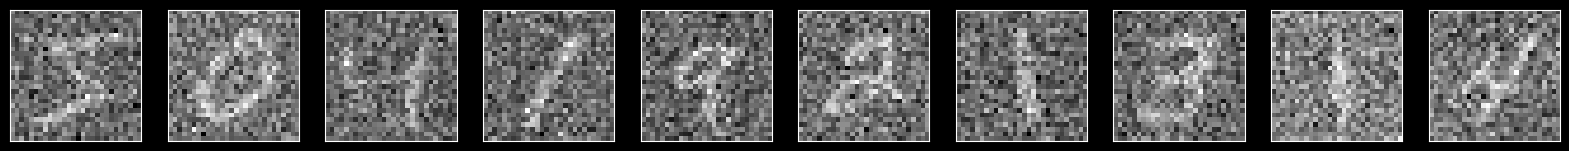

In [5]:
# 1. display 10 random noisy train images
n = 10
indices = np.random.randint(0 , xtrain.shape[0], n)

plt.figure(figsize = (20 , 2))
for i , index in enumerate(indices):
    ax = plt.subplot(1 , n , i + 1)
    plt.imshow(xtrain_noise[i].reshape(28 , 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [7]:
def create_model():
    iimg = layers.Input(shape = (784,))
    en = layers.Dense(128 , activation = 'relu')(iimg)
    en = layers.Dense(64 , activation = 'relu')(en)
    en = layers.Dense(32 , activation = 'relu')(en)

    # decoder
    de = layers.Dense(64 , activation = 'relu')(en)
    de = layers.Dense(128 , activation = 'relu')(de)
    de = layers.Dense(784 , activation = 'sigmoid')(de)

    # create model and compile

    model = keras.Model(inputs = iimg , outputs = de)
    model.compile(optimizer = 'adam' , loss = 'binary_crossentropy')
    
    return model

model = create_model()
model.fit(x = xtrain_noise , y = xtrain , epochs = 100 , batch_size = 256 , shuffle = True , validation_data = (xtest_noise , xtest))
model.save('./data/denoise_encoder.keras')

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3423 - val_loss: 0.1813
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1735 - val_loss: 0.1560
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1528 - val_loss: 0.1447
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1433 - val_loss: 0.1390
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1376 - val_loss: 0.1351
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1336 - val_loss: 0.1327
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1306 - val_loss: 0.1308
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1281 - val_loss: 0.1285
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1262 - val_loss: 0.1274
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1247 - val_loss: 0.1255
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1235 - val_loss: 0.1247
Epoch 12/100
235/235 ━━━━━━━━━━━━━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step


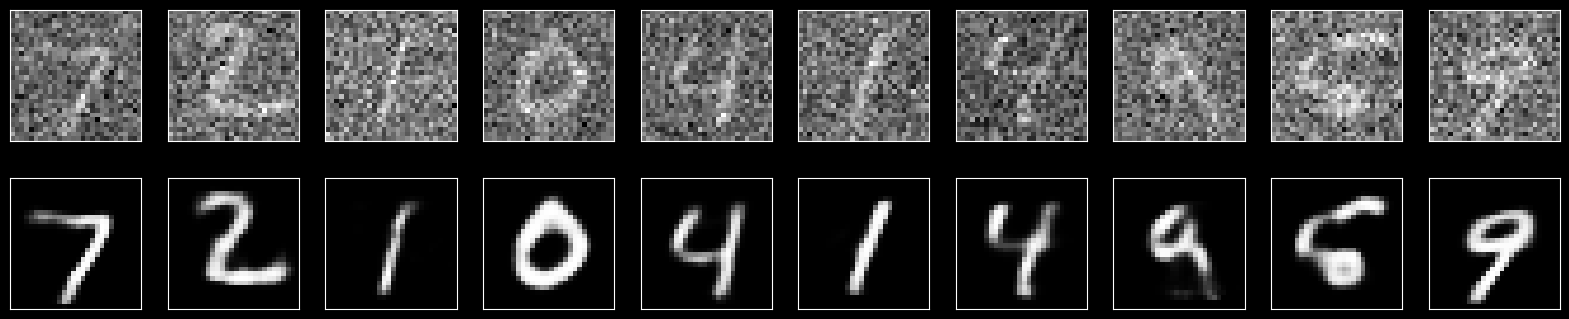

In [ ]:
dtest = model.predict(xtest_noise)

n = 10
indices = np.random.randint(0 , xtest.shape[0] , n)

plt.figure(figsize = (20 , 4))

for i , index in enumerate(indices):
    #  print noisy image
    ax = plt.subplot(2 , n , i + 1)
    plt.imshow(xtest_noise[i].reshape(28 , 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # print original image
    ax = plt.subplot(2 , n , n + i + 1)
    plt.imshow(dtest[i].reshape(28 , 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


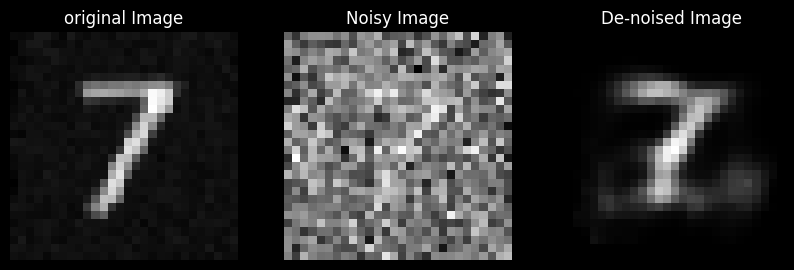

In [45]:
ipath = './data/s5.png'
img = np.array(keras.utils.load_img(ipath , color_mode= 'grayscale' , target_size= (28 , 28)))
img = img.astype('float32') / 255.
img = img.reshape(1 , np.prod(img.shape))
nimg = img + 0.4 * np.random.normal(loc = 0 , scale = 1 , size = img.shape)
oimg = model.predict(nimg)
plt.figure(figsize = (10 , 4))


plt.subplot(1 , 3, 1)
plt.imshow(img.reshape(28 , 28))
plt.gray()
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.title('original Image')


plt.subplot(1 , 3, 2)
plt.imshow(nimg.reshape(28 , 28))
plt.gray()
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.title('Noisy Image')


plt.subplot(1 , 3, 3)
plt.imshow(oimg.reshape(28 , 28))
plt.gray()
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.title('De-noised Image')



plt.show()

0.011764706